### Step1: Import Modules and Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv",header=0,parse_dates=['created_at'])
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


### Step2: Data Cleaning and Exploration

In [3]:
data.info()
#the dataset looks clean enough, as Datatype in all columns appear reasonable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [4]:
print(data["created_at"].agg(['max','min']))
# the dataset contains information of a 30-day timeframe, no need to trim the data

max   2017-03-30 23:55:35
min   2017-03-01 00:08:09
Name: created_at, dtype: datetime64[ns]


In [5]:
data.describe()
# From summary statistics of numerical variables, 
# we can see that order_amount is highly skewed, so is total_items, 
# This indicates extreme cases where single customer purchase in large quantity might distort the AOV result

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
data.groupby('payment_method')[['order_amount','total_items']].mean()
# exploration on categorical variable shows that:
# 1)purchase through credit card has much higher order amount and total items than through cash or debit

,order_amount,total_items
payment_method,,
cash,730.353199,1.963614
credit_card,7461.594813,21.564841
debit,966.840215,2.029324


In [7]:
data.groupby('shop_id')[['order_amount','total_items']].mean().sort_values('order_amount',ascending=False)
# exploration on categorical variable shows that:
# 2)different shops differ significantly on order amount and total items, especially shop 42 & shop 78

,order_amount,total_items
shop_id,,
42,235101.490196,667.901961
78,49213.043478,1.913043
50,403.545455,2.090909
90,403.224490,2.265306
38,390.857143,2.057143
...,...,...
53,214.117647,1.911765
100,213.675000,1.925000
32,189.976190,1.880952


In [8]:
data.groupby('user_id')[['order_amount','total_items']].mean().sort_values('order_amount',ascending=False)
# exploration on categorical variable shows that:
# 3)different users also differ significantly on order amount and total items

,order_amount,total_items
user_id,,
607,704000.000000,2000.000000
878,14266.909091,2.181818
766,8007.600000,2.300000
834,6019.000000,2.111111
915,5785.142857,2.071429
...,...,...
892,227.307692,1.538462
899,226.666667,1.666667
827,226.500000,1.500000


#### Summary:
Based on preliminary exploration, we suspect that outliers related to specific shop/user/payment method result in the distorted AOV

### Step3: Addressing Question 1 a)

Text(0, 0.5, 'order_amount')

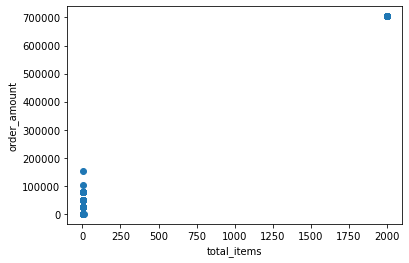

In [9]:
plt.scatter(data['total_items'],data['order_amount'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('order_amount')
#To resolve the issue, create a scatter plot based on total_items & order_amount,
#and we can easily find outliers which features total_items≈2000, order_amount≈700000

In [10]:
outlier=data[data['order_amount']>600000]
outlier.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00


In [11]:
outlier.describe()
#a closer look at these outliers shows that 
# they include 17 transactions that all come from user_id 607 purchasing from shop_id 42, all paid through credit_card
# this confirmed our earlier suspect

,order_id,shop_id,user_id,order_amount,total_items
count,17.000000,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0
std,1603.584872,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0
25%,1363.000000,42.0,607.0,704000.0,2000.0
50%,2154.000000,42.0,607.0,704000.0,2000.0
75%,3333.000000,42.0,607.0,704000.0,2000.0
max,4883.000000,42.0,607.0,704000.0,2000.0


Text(0, 0.5, 'order_amount')

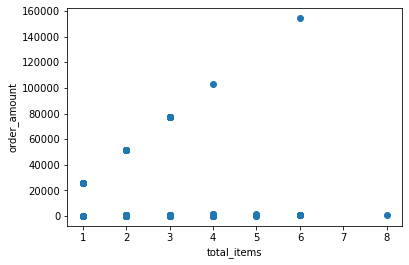

In [12]:
data_cleaned=pd.DataFrame(data)
data_cleaned=data_cleaned[data_cleaned['order_amount']<600000]
plt.scatter(data_cleaned['total_items'],data_cleaned['order_amount'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('order_amount')
#reexamine the transactions after removing the above-mentioned outliers,
# we still see two very different distributions in the scatter plot
# one featuring low total_items and low order_amount, 
# the other featuring low total_items yet high order_amount, which indicate high unit price

In [13]:
data_cleaned.loc[:,'unit_price']=data_cleaned.loc[:,'order_amount']/data_cleaned.loc[:,'total_items']
outlier1=data_cleaned[data_cleaned['order_amount']>20000]
outlier1.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


In [14]:
outlier1.describe()
#a closer look at the new outliers shows that
#they include 46 transactions that all come from shop_id 78, which sells high unit_price products

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


Text(0, 0.5, 'order_amount')

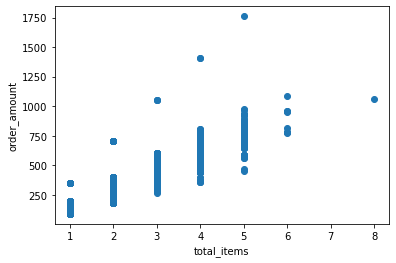

In [15]:
data_cleaned1=data_cleaned[data_cleaned['order_amount']<20000]
plt.scatter(data_cleaned1['total_items'],data_cleaned1['order_amount'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('order_amount')
#after removing the 2nd type outliers,it still appears to exist two different distributions in the scatter plot

Text(0, 0.5, 'unit_price')

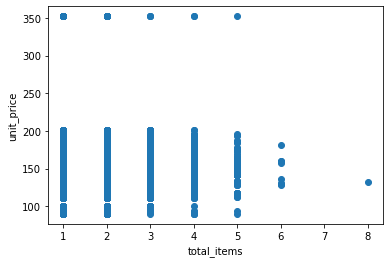

In [16]:
plt.scatter(data_cleaned1['total_items'],data_cleaned1['unit_price'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('unit_price')
#The scatter plot based on total_items & unit_price shows more clearly the existence of different distributions

In [17]:
outlier2=data_cleaned1[data_cleaned1['unit_price']>300]
outlier2.head()
# dive deep into the data, we find that the 3rd type of outlier also comes from shop 42, the shop that recorded large quantity orders 

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0


In [18]:
data_cleaned2=data_cleaned1[data_cleaned1['unit_price']<300]
pd.concat([data_cleaned2[data_cleaned2['shop_id']==78],data_cleaned2[data_cleaned2['shop_id']==42]])
# after removing the above mentioned 3 types of outliers, we find that the remaining observations contain no data of shop 42 or shop 78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price


Text(0, 0.5, 'order_amount')

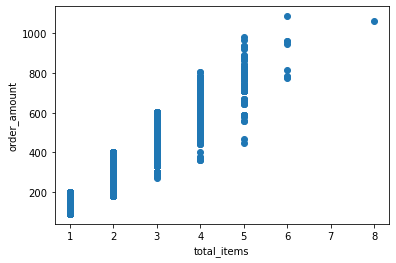

In [19]:
plt.scatter(data_cleaned2['total_items'],data_cleaned2['order_amount'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('order_amount')
# And the remaining observations exhibit the pattern of 1 unified distribution

Text(0, 0.5, 'unit_price')

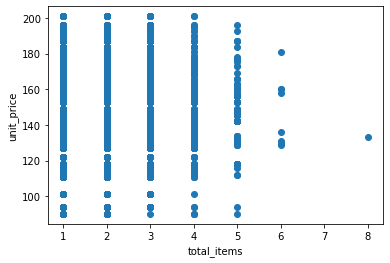

In [20]:
plt.scatter(data_cleaned2['total_items'],data_cleaned2['unit_price'],alpha=1)
plt.xlabel('total_items')
plt.ylabel('unit_price')
# scatter plot of total items vs. unit_price also shows that the remaining observations exhibit the pattern of 1 unified distribution

#### Summary:
The distorted AOV is caused by 
 1) extremely high unit price of product sold in shop 78 (shop 78 might be selling Luxury shoes)
 
 2) relatively high unit price in shop 42, which also has large quantity orders from customer 607 (shop 42 might have wholesale service)

Since wholesale buyer or luxury buyer has significantly different behavioral pattern than normal sneakers buyers, the solution would be to seperate shop 42,78 from the rest of the shops, and to study AOV of the 3 groups (shop 42, shop 78, the rest) seperately

### Step4: Addressing Question 1 b) & c)
The easy way is to calculate Median of Order Value (MOV) instead of AOV on the complete dataset, however as summarized in step 2, the more scientific way would be to seperate the observations into 3 groups (shop 42, shop 78, the rest),and the below metric could be useful:

1) For Shop 42 or Shop 78, since unit price is constant, order_amount is decided solely by total_items, therefore it is easier for these shops to look at  Average Order Quantity (AOQ)

2）For the rest of the shops, AOV is necessary, however we could also report Average Order Quantity (AOQ) and Average Unit Price (AUP) to help identify whether the root cause for changes in AOV exist in change in sales volume or change in sales structure(product of different prices) 

In [21]:
metrics={}

metrics.update({'Overall MOV':data['order_amount'].median()})

shop42=data[data['shop_id']==42]
metrics.update({'shop42 AOQ':shop42['total_items'].mean()})

shop78=data[data['shop_id']==78]
metrics.update({'shop78 AOQ':shop78['total_items'].mean()})

data['unit_price']=data['order_amount']/data['total_items']
majority=data[data['shop_id']!=78]
majority=majority[majority['shop_id']!=42]
metrics.update({'majority AOV':majority['order_amount'].mean(),'majority AOQ':majority['total_items'].mean(),'majority AUP':majority['unit_price'].mean()})

In [22]:
metrics

{'Overall MOV': 284.0,
 'shop42 AOQ': 667.9019607843137,
 'shop78 AOQ': 1.9130434782608696,
 'majority AOV': 300.1558229655313,
 'majority AOQ': 1.9957169080155006,
 'majority AUP': 150.40016316540894}